In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB

In [3]:
data = pd.read_json('Downloads/Apps_for_Android_5.json', lines = True)

In [4]:
data.shape

(752937, 9)

In [5]:
data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B004A9SDD8,"[1, 1]",3,"Loves the song, so he really couldn't wait to ...","11 2, 2013",A1N4O8VOJZTDVB,Annette Yancey,Really cute,1383350400
1,B004A9SDD8,"[0, 0]",5,"Oh, how my little grandson loves this app. He'...","12 5, 2011",A2HQWU6HUKIEC7,"Audiobook lover ""Kathy""",2-year-old loves it,1323043200
2,B004A9SDD8,"[0, 0]",5,I found this at a perfect time since my daught...,"05 21, 2012",A1SXASF6GYG96I,Barbara Gibbs,Fun game,1337558400
3,B004A9SDD8,"[3, 4]",5,My 1 year old goes back to this game over and ...,"12 6, 2012",A2B54P9ZDYH167,"Brooke Greenstreet ""Babylove""",We love our Monkeys!,1354752000
4,B004A9SDD8,"[1, 1]",5,There are three different versions of the song...,"02 1, 2014",AFOFZDTX5UC6D,C. Galindo,This is my granddaughters favorite app on my K...,1391212800


In [6]:
data.isnull().sum()

asin                  0
helpful               0
overall               0
reviewText            0
reviewTime            0
reviewerID            0
reviewerName      58198
summary               0
unixReviewTime        0
dtype: int64

In [7]:
data2 = data.groupby('overall').size()
data2

overall
1     78713
2     44385
3     85121
4    158081
5    386637
dtype: int64

In [8]:
per= data2/sum(data2)*100
per

overall
1    10.454128
2     5.894916
3    11.305196
4    20.995249
5    51.350511
dtype: float64

In [9]:
data = data.drop(columns = ['asin', 'helpful', 'reviewTime', 'reviewerID', 'reviewerName', 'unixReviewTime'])

In [10]:
# for model building consider 1,2,3 star rating as 0(Low Rating) and 4,5 included as 1(High  Rating)
data = data[pd.notnull(data.summary)]
data['overall']=data['overall'].apply(lambda x: 1 if (x > 3)  else 0)
print(data.shape)
data.head()

(752937, 3)


,overall,reviewText,summary
0,0,"Loves the song, so he really couldn't wait to ...",Really cute
1,1,"Oh, how my little grandson loves this app. He'...",2-year-old loves it
2,1,I found this at a perfect time since my daught...,Fun game
3,1,My 1 year old goes back to this game over and ...,We love our Monkeys!
4,1,There are three different versions of the song...,This is my granddaughters favorite app on my K...


In [11]:
data2 = data.groupby('overall').size()
per= data2/sum(data2)*100
per

overall
0    27.654239
1    72.345761
dtype: float64

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14520\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [14]:
stop_words = stopwords.words('english')

In [15]:
data['reviewText'] = data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data['summary'] = data['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [16]:
data['reviewText'].head()

0    Loves song, really wait play this. A little le...
1    Oh, little grandson loves app. He's always ask...
2    I found perfect time since daughter's favorite...
3    My 1 year old goes back game again. It simple ...
4    There three different versions song. The game ...
Name: reviewText, dtype: object

In [17]:
data['summary'].head()

0                                 Really cute
1                            2-year-old loves
2                                    Fun game
3                            We love Monkeys!
4    This granddaughters favorite app Kindle!
Name: summary, dtype: object

In [18]:
# define X and y (from the reviewText  data) for use with COUNTVECTORIZER
# will iterate again with summary data to see the different
X = data.reviewText
y = data.overall

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
print(type(X_train_dtm))
print(X_train_dtm.shape)
#print(X_train_dtm)

<class 'scipy.sparse.csr.csr_matrix'>
(564702, 137358)


In [21]:
nb = MultinomialNB().fit(X_train_dtm, y_train)

In [22]:
#Predict which class a reviewText would belong to
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [24]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.73      0.67      0.70     52117
          1       0.88      0.90      0.89    136118

avg / total       0.84      0.84      0.84    188235



In [25]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc

0.8391956862432598

In [26]:
error=1-acc
error

0.1608043137567402

In [27]:
tfidf = TfidfVectorizer()
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
print(type(X_train_dtm))
print(X_train_dtm.shape)
nb = MultinomialNB().fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

<class 'scipy.sparse.csr.csr_matrix'>
(564702, 137358)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.83      0.48      0.61     52117
          1       0.83      0.96      0.89    136118

avg / total       0.83      0.83      0.81    188235



In [29]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc

0.8288469200733126

Use bad of words and Tfidf on 'Summary'

BoW

In [30]:
X = data.summary
y = data.overall

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm

(<564702x37303 sparse matrix of type '<class 'numpy.int64'>'
 	with 1334117 stored elements in Compressed Sparse Row format>,
 <188235x37303 sparse matrix of type '<class 'numpy.int64'>'
 	with 437356 stored elements in Compressed Sparse Row format>)

In [33]:
nb = MultinomialNB().fit(X_train_dtm, y_train)
#Predict which class a summary would belong to
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.76      0.61      0.68     52117
          1       0.86      0.93      0.89    136118

avg / total       0.84      0.84      0.83    188235



In [35]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc

0.8405928759263687

Tfidf

In [36]:
tfidf = TfidfVectorizer()
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
print(type(X_train_dtm))
print(X_train_dtm.shape)
nb = MultinomialNB().fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

<class 'scipy.sparse.csr.csr_matrix'>
(564702, 37303)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.77      0.60      0.68     52117
          1       0.86      0.93      0.89    136118

avg / total       0.83      0.84      0.83    188235



In [38]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc

0.8403485005445321

In [48]:
count_class_0, count_class_1 = target.value_counts()

NameError: name 'target' is not defined

In [44]:
# Class count
count_class_0, count_class_1 = data.overall.value_counts()
print(count_class_0, count_class_1)
# Divide by class
data_class_0 = data[data['overall'] == 0]
data_class_1 = data[data['overall'] == 1]

544718 208219


Random under-sampling:
1    544718
0    208219
Name: overall, dtype: int64


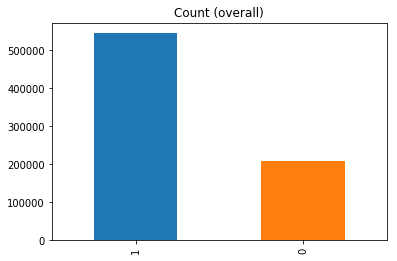

In [54]:
#random undersampling
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under.overall.value_counts())

data_test_under.overall.value_counts().plot(kind='bar', title='Count (overall)')
#sns.barplot(x = data_test_under.overall.value_counts().index, y = data_test_under.overall.value_counts().values, data = data_test_under)

Random over-sampling:
1    544718
0    208219
Name: overall, dtype: int64


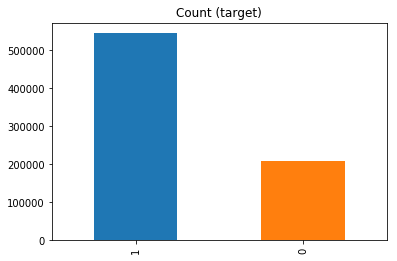

In [46]:
#random oversampling
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.overall.value_counts())

data_test_over.overall.value_counts().plot(kind='bar', title='Count (overall)')

In [58]:
#X = data_test_over.loc[:, data.columns != 'overall']
#y = data_test_over['overall']

In [62]:
X = data_test_over.loc[:, 'reviewText']
y = data_test_over['overall']

In [63]:
#BoW
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
nb = MultinomialNB().fit(X_train_dtm, y_train)
#Predict which class a summary would belong to
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.73      0.68      0.70     51671
          1       0.88      0.90      0.89    136564

avg / total       0.84      0.84      0.84    188235



In [66]:
#Tfidf
tfidf = TfidfVectorizer()
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
print(type(X_train_dtm))
print(X_train_dtm.shape)
nb = MultinomialNB().fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

<class 'scipy.sparse.csr.csr_matrix'>
(564702, 118600)


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.81      0.51      0.63     51671
          1       0.84      0.96      0.89    136564

avg / total       0.83      0.83      0.82    188235



In [73]:
y = data_test_under['overall']
X = data_test_under.loc[:, 'summary']

In [74]:
#BoW
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
nb = MultinomialNB().fit(X_train_dtm, y_train)
#Predict which class a summary would belong to
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [75]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.76      0.62      0.68     51671
          1       0.86      0.93      0.89    136564

avg / total       0.84      0.84      0.84    188235



In [76]:
#Tfidf
tfidf = TfidfVectorizer()
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm, X_test_dtm
print(type(X_train_dtm))
print(X_train_dtm.shape)
nb = MultinomialNB().fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

<class 'scipy.sparse.csr.csr_matrix'>
(564702, 37320)


array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [77]:
acc= metrics.accuracy_score(y_test, y_pred_class)
acc
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.77      0.60      0.67     51671
          1       0.86      0.93      0.89    136564

avg / total       0.84      0.84      0.83    188235

